So far, we have evaluated **classification performance using accuracy** and **regression performance using R²**. However, these are
only two of the many possible ways to summarize how well a supervised model performs on a given dataset.*

When selecting a metric, you should always have the end goal of the machine learning application in mind. In practice, we are usually interested not just in making
accurate predictions, but in using these predictions as part of a larger decisionmaking process. Before picking a machine learning metric, you should think about
the high-level goal of the application, often called the **business metric**. 

The consequences of choosing a particular algorithm for a machine learning application are called the **business impact**


## Binary Classification

For **binary classification**, we often speak of a **positive class and a negative class**, with
the understanding that the positive class is the one we are looking for.

Often, accuracy is not a good measure of predictive performance, as the number of
mistakes we make does not contain all the information we are interested in

An incorrect positive prediction is called a **false positive**.

An incorrect negative prediction is called a **false negative**. 

Types of errors play an important role when one of two classes is much more frequent than the other one. Datasets in which one class is much more frequent than the other are often called **imbalanced datasets**, or datasets with imbalanced classes. In reality, imbalanced data is the norm,
and it is rare that the events of interest have equal or even similar frequency in the
data.

In [1]:
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split

In [10]:
# Exemple of no good model
from sklearn.datasets import load_digits
digits = load_digits()
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(
 digits.data, y, random_state=0)
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))
#We obtained close to 90% accuracy without learning anything
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

Unique predicted labels: [False]
Test score: 0.90
Test score: 0.92


In [3]:
from sklearn.linear_model import LogisticRegression
dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy score: {:.2f}".format(dummy.score(X_test, y_test)))
logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

dummy score: 0.90
logreg score: 0.98


c:\Users\bapdu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy is an inadequate measure for quantifying predictive performance in this imbalanced setting. 

### Confusion Matrices

One of the most comprehensive ways to represent the result of evaluating binary clas‐
sification is using **confusion matrices**

The output of confusion_matrix is a two-by-two array, where the rows correspond
to the true classes and the columns correspond to the predicted classes. Each entry
counts how often a sample that belongs to the class corresponding to the row (here,
“not nine” and “nine”) was classified as the class corresponding to the column

Confusion matrix:
[[402   1]
 [  6  41]]


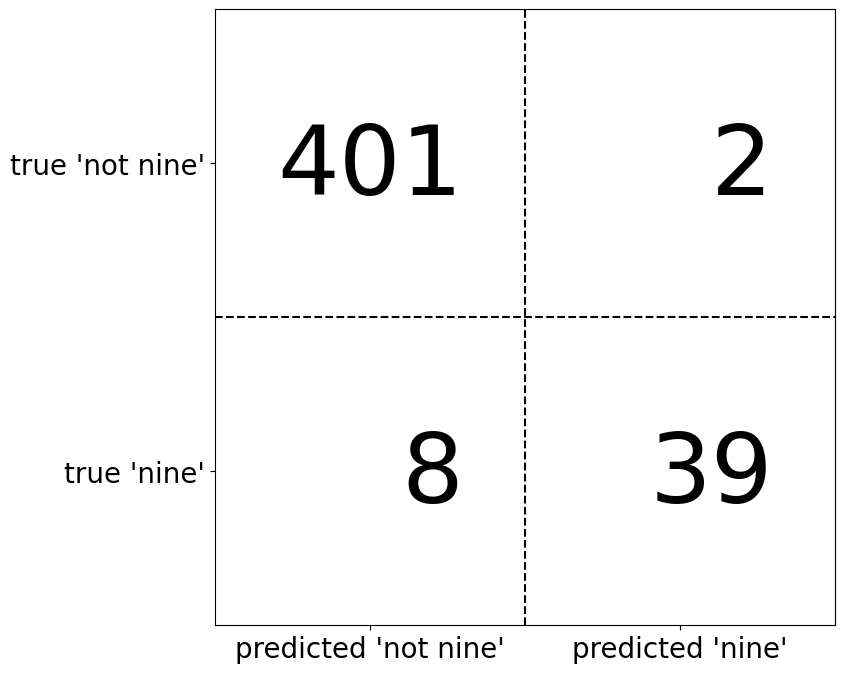

In [6]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))
mglearn.plots.plot_confusion_matrix_illustration()

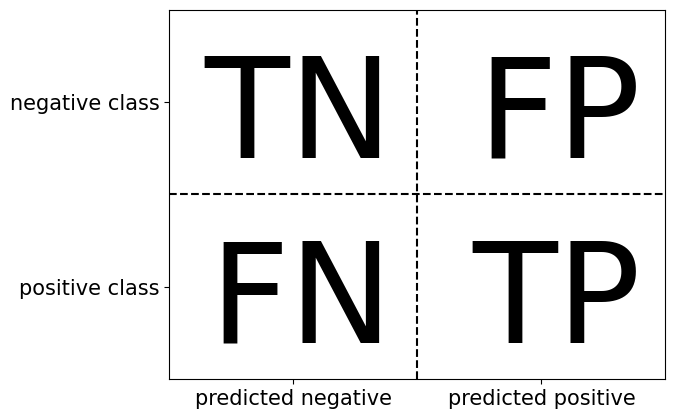

In [8]:
mglearn.plots.plot_binary_confusion_matrix()

In [11]:
print("Most frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nDummy model:")
print(confusion_matrix(y_test, pred_dummy))
print("\nDecision tree:")
print(confusion_matrix(y_test, pred_tree))
print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[403   0]
 [ 47   0]]

Decision tree:
[[390  13]
 [ 24  23]]

Logistic Regression
[[402   1]
 [  6  41]]


$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$
In other words, accuracy is the number of correct predictions (TP and TN) divided
by the number of all samples (all entries of the confusion matrix summed up).

$$
\text{Precision} = \frac{TP }{TP + FP}
$$
Precision is used as a performance metric when the goal is to **limit the number of false positives.**

$$
\text{Recall} = \frac{TP }{TP + FN}
$$

**Recall**, on the other hand, measures **how many of the positive samples are captured by the positive predictions**:
Recall is used as performance metric when we need to identify all positive samples; that is, when it is important to **avoid false negatives**

So, while precision and recall are very important measures, looking at only one of them will not provide you with the full picture. One way to summarize them is the
**f-score** or f-measure, which is with the harmonic mean of precision and recall:

$$
\text{F} = \frac{precision*recall }{precision + recall}
$$

In [12]:
from sklearn.metrics import f1_score
print("f1 score most frequent: {:.2f}".format(
 f1_score(y_test, pred_most_frequent)))
print("f1 score dummy: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f1 score tree: {:.2f}".format(f1_score(y_test, pred_tree)))
print("f1 score logistic regression: {:.2f}".format(
 f1_score(y_test, pred_logreg)))


f1 score most frequent: 0.00
f1 score dummy: 0.00
f1 score tree: 0.55
f1 score logistic regression: 0.92


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent,
 target_names=["not nine", "nine"]))
print(classification_report(y_test, pred_dummy,
 target_names=["not nine", "nine"]))
print(classification_report(y_test, pred_logreg,
 target_names=["not nine", "nine"]))


              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450

              precision    recall  f1-score   support

    not nine       0.99      1.00      0.99       403
        nine       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



c:\Users\bapdu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bapdu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bapdu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

The confusion matrix and the classification report provide a very detailed analysis of a particular set of predictions. However, the predictions themselves already threw
away a lot of information that is contained in the model.

Most classifiers provide a **decision_function** or a **predict_proba** method to assess degrees of certainty about predictions. Making predictions can be seen as
thresholding the output of decision_function or predict_proba at a certain fixed point—in binary classification we use 0 for the decision function and 0.5 for
predict_proba.

Often, when developing a new model, it is not entirely clear what the operating point
will be. For this reason, and to understand a modeling problem better, it is instructive
to look at all possible thresholds, or all possible trade-offs of precision and recalls at
once. This is possible using a tool called the **precision-recall curve**. You can find the
function to compute the precision-recall curve in the sklearn.metrics module. It
needs the ground truth labeling and predicted uncertainties, created via either
decision_function or predict_proba

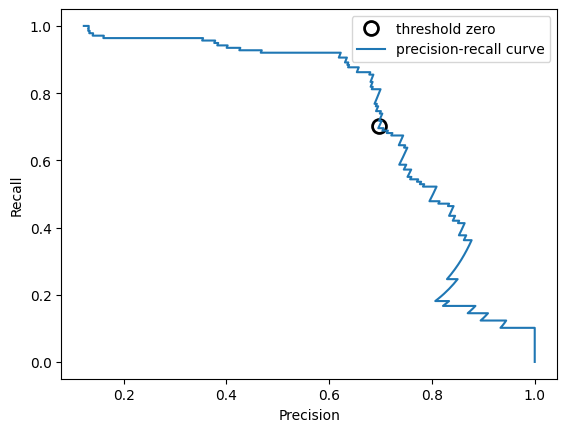

In [25]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve
centers = [[-5, 0], [5, 0]]
# Générer plus de points pour une courbe plus lisse
X, y = make_blobs(n_samples=(4000, 500), centers=centers, cluster_std=[7.0, 2], random_state=22)
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Entraîner le modèle SVC
svc = SVC(gamma=.05).fit(X_train, y_train)

# Calculer la courbe précision-rappel
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

# Trouver le seuil le plus proche de zéro
close_zero = np.argmin(np.abs(thresholds))

# Tracer la courbe précision-rappel
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall, label="precision-recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend()
plt.show()

Each point along the curve corresponds to a possible threshold of the decision_function

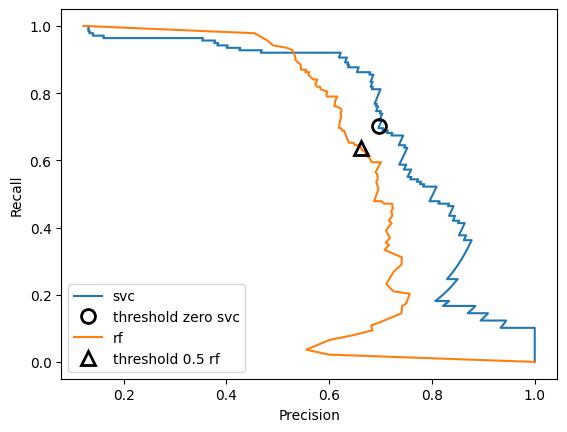

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)
# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
 y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(precision, recall, label="svc")
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
 label="threshold zero svc", fillstyle="none", c='k', mew=2)
plt.plot(precision_rf, recall_rf, label="rf")
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
 markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [27]:
print("f1_score of random forest: {:.3f}".format(
 f1_score(y_test, rf.predict(X_test))))
print("f1_score of svc: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))


f1_score of random forest: 0.647
f1_score of svc: 0.700


One particular way to summarize the precision-recall curve is by computing the **integral or area under the curve of the precision-recall curve, also known as the average precision.**

You can use the average_precision_score function
to compute the average precision. Because we need to compute the ROC curve and
consider multiple thresholds, the result of decision_function or predict_proba
needs to be passed to average_precision_score, not the result of predict

In [28]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("Average precision of random forest: {:.3f}".format(ap_rf))
print("Average precision of svc: {:.3f}".format(ap_svc))


Average precision of random forest: 0.645
Average precision of svc: 0.765


There is another tool that is commonly used to analyze the behavior of classifiers at
different thresholds: the receiver operating characteristics curve, or **ROC curve** for
short. Similar to the precision-recall curve, the ROC curve considers all possible thresholds for a given classifier, but instead of reporting precision and recall, it shows the **false positive rate (FPR) against the true positive rate (TPR)**

$$
\text{FPR} = \frac{TP }{TP + TN}

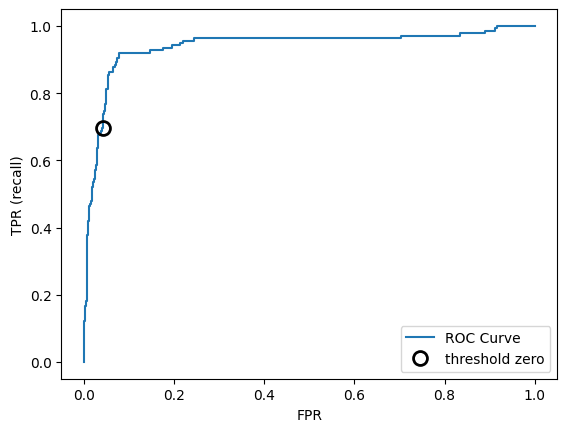

In [29]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
 label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

For the ROC curve, the ideal curve is close to the top left: you want a classifier that produces a high recall while keeping a low false positive rate.

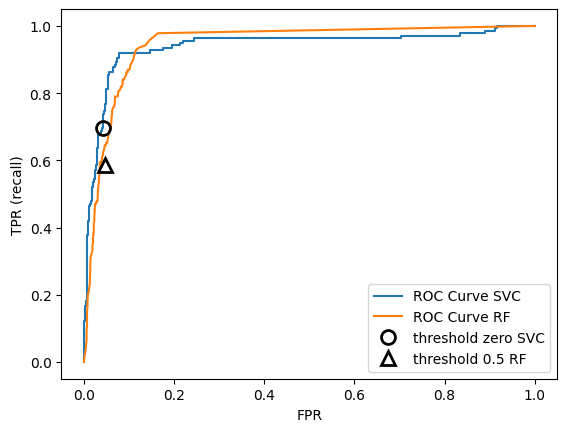

In [30]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
 label="threshold zero SVC", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10,
 label="threshold 0.5 RF", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [31]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC for Random Forest: {:.3f}".format(rf_auc))
print("AUC for SVC: {:.3f}".format(svc_auc))

AUC for Random Forest: 0.946
AUC for SVC: 0.940


The **AUC** can be interpreted as **evaluating the ranking of positive samples**. It’s equivalent to the probability that a randomly picked point of the positive class will have a higher score according to the classifier than a randomly picked point from the negative class. So, a perfect AUC of 1 means that all positive points have a higher score than all negative points. For classification problems with imbalanced classes, using AUC for model selection is often much more meaningful than using accuracy

## Metrics for Multiclass Classification

Basically, all metrics for multiclass classification are derived from binary classification metrics, but averaged over all classes. Accuracy for multiclass classification is again defined as the fraction
of correctly classified examples

In [32]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(
 digits.data, digits.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))

Accuracy: 0.951
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


c:\Users\bapdu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        43
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       1.00      1.00      1.00        48
           9       0.98      0.98      0.98        47

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450



The most commonly used metric for imbalanced datasets in the multiclass setting is
the **multiclass version of the f-score.** The idea behind the multiclass f-score is to **compute one binary f-score per class**, with that class being the positive class and the other classes making up the negative classes. Then, these per-class f-scores are averaged using one of the following strategies:

• **"macro"** averaging computes the unweighted per-class f-scores. This gives equal
weight to all classes, no matter what their size is.

• **"weighted"** averaging computes the mean of the per-class f-scores, weighted by
their support. This is what is reported in the classification report.

• **"micro"** averaging computes the total number of false positives, false negatives,
and true positives over all classes, and then computes precision, recall, and fscore using these counts

In [36]:
print("Micro average f1 score: {:.3f}".format
 (f1_score(y_test, pred, average="micro")))
print("Macro average f1 score: {:.3f}".format
 (f1_score(y_test, pred, average="macro")))


Micro average f1 score: 0.996
Macro average f1 score: 0.996


## Regression Metrics

However, in most applications we’ve seen, **using the default R² used in the score method of all regressors is enough**

## Using Evaluation Metrics in Model Selection

However, we often want to use metrics like AUC in
model selection using GridSearchCV or cross_val_score. Luckily scikit-learn
provides a very simple way to achieve this, via the scoring argument that can be used
in both GridSearchCV and cross_val_score. Y

In [38]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
# default scoring for classification is accuracy
print("Default scoring: {}".format(
 cross_val_score(SVC(), digits.data, digits.target == 9)))
# providing scoring="accuracy" doesn't change the results
explicit_accuracy = cross_val_score(SVC(), digits.data, digits.target == 9,
 scoring="accuracy")
print("Explicit accuracy scoring: {}".format(explicit_accuracy))
roc_auc = cross_val_score(SVC(), digits.data, digits.target == 9,
 scoring="roc_auc")
print("AUC scoring: {}".format(roc_auc))

Default scoring: [0.975      0.99166667 1.         0.99442897 0.98050139]
Explicit accuracy scoring: [0.975      0.99166667 1.         0.99442897 0.98050139]
AUC scoring: [0.99717078 0.99854252 1.         0.999828   0.98400413]


In [39]:
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(
 digits.data, digits.target == 9, random_state=0)
# we provide a somewhat bad grid to illustrate the point:
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
# using the default scoring of accuracy:
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("Grid-Search with accuracy")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (accuracy)): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(
 roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))

Grid-Search with accuracy
Best parameters: {'gamma': 0.0001}
Best cross-validation score (accuracy)): 0.976
Test set AUC: 0.992
Test set accuracy: 0.973


In [40]:
# using AUC scoring instead:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="roc_auc")
grid.fit(X_train, y_train)
print("\nGrid-Search with AUC")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (AUC): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(
 roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))



Grid-Search with AUC
Best parameters: {'gamma': 0.01}
Best cross-validation score (AUC): 0.998
Test set AUC: 1.000
Test set accuracy: 1.000


The most important values for the scoring parameter for classification are **accuracy (the default); roc_auc for the area under the ROC curve; average_precision for the area under the precision-recall curve; f1, f1_macro, f1_micro, and f1_weighted for the binary f1 -score and the different weighted variants.**

**For regression, the most commonly used values are r2 for the R² score mean_squared_error for mean squared error, and mean_absolute_error for mean absolute error.**